In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pygraphviz
from networkx.drawing.nx_agraph import to_agraph

### Construct the chain graph

In [2]:
chain = nx.Graph()
for i in range(30):
    if i == 0:
        continue
    chain.add_weighted_edges_from([(i-1, i, 1)])

### Compute adjacency matrix, degree matrix, lapacian matrix and its eigenvectors

In [4]:
chain_A = nx.to_numpy_array(chain)

chain_D = np.zeros(np.shape(chain_A))
for i in range(len(chain_A)):
    chain_D[i][i] = np.sum(chain_A[i])

chain_L = chain_D - chain_A
chain_w, chain_v = np.linalg.eigh(chain_L)

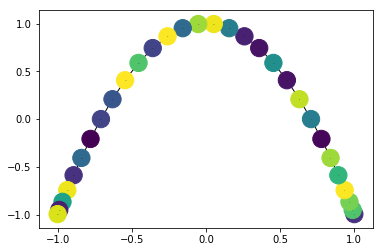

In [11]:
pos = nx.spectral_layout(chain)
nx.draw_networkx(chain, pos=pos, node_color=chain_v[19], font_size=0)
# for i in range(20):
#     nx.draw_networkx(chain, pos=pos, node_color=chain_v[i], font_size=0)

In [5]:
import seaborn as sns

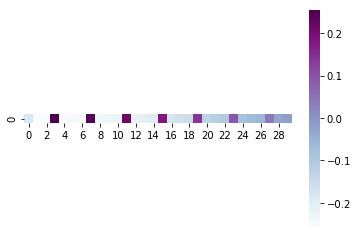

In [6]:
# ax = sns.heatmap(np.reshape(chain_v[0], [1, 30]))
ax = sns.heatmap(np.reshape(chain_v[0], [1, 30]),cmap="BuPu", square=True)

### Create a lattice graph

In [13]:
lattice = nx.grid_graph([30, 30])

lattice_A = nx.to_numpy_array(lattice)

lattice_D = np.zeros(np.shape(lattice_A))

for i in range(len(lattice_A)):
    lattice_D[i][i] = np.sum(lattice_A[i])

lattice_L = lattice_D - lattice_A

lattice_w, lattice_v = np.linalg.eigh(lattice_L)

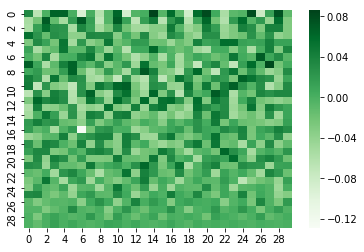

In [14]:
ax = sns.heatmap(np.reshape(lattice_v[1], [30, 30]), cmap="Greens")

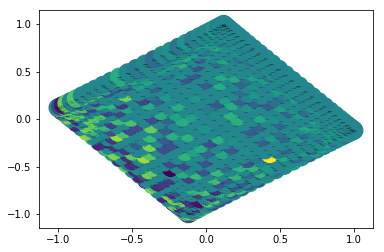

In [17]:
pos = nx.spectral_layout(lattice)
nx.draw_networkx(lattice, pos=pos, node_color=lattice_v[0], font_size=0)

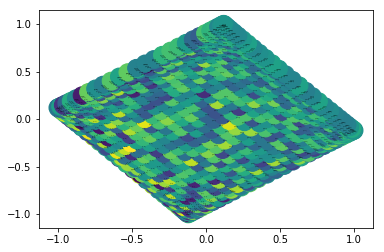

In [18]:
nx.draw_networkx(lattice, pos=pos, node_color=lattice_v[19], font_size=0)

### Reconstruct image using eigenvectors

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [25]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#### Load image and resize

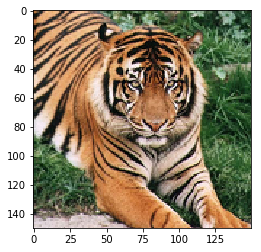

In [26]:
image = Image.open('tiger.jpg')
image.thumbnail((150, 150), Image.ANTIALIAS)

plt.imshow(image)

(150, 150)


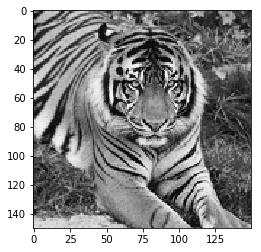

In [27]:
image = np.array(image)

gray = np.dot(image[...,:3], [0.299, 0.587, 0.114])
# for i in range(150):
#     for j in range(150):
#         gray[i][j] =  0.2989 * image[i][j][0] + 0.5870 * image[i][j][1] + 0.1140 * image[i][j][2]

plt.imshow(gray, cmap='gray')
print(np.shape(gray))

In [30]:
mean_image = np.zeros([150*150])
mean = np.average(gray)
mean_image.fill(mean)
mean_image = np.reshape(mean_image, [150, 150])

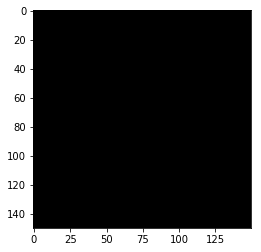

In [31]:
plt.imshow(mean_image, cmap='gray')